In [1]:
%load_ext autoreload
%autoreload 2
import enoki as ek
import mitsuba
mitsuba.set_variant('gpu_autodiff_rgb')

import time
import torch
import cv2
import copy
from matplotlib import pyplot as plt
import numpy as np

from mitsuba.python.autodiff import render, render_torch, write_bitmap
from mitsuba.python.util import traverse
from mitsuba.core.xml import load_file
from mitsuba.core import Thread, Vector3f,LogLevel

cuda:0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'front')

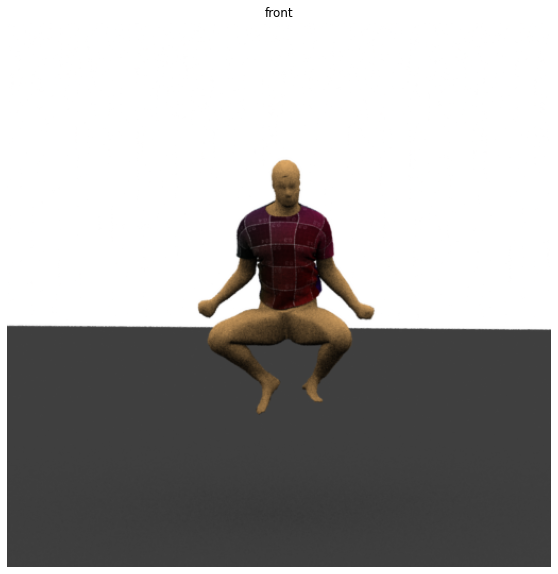

In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

myThread = Thread.thread()
myThread.file_resolver().append('data/radek/')
logger = myThread.logger()
logger.set_log_level(LogLevel.Warn)

scene = load_file('data/radek/00008_mesh88_animated.xml')
crop_size = scene.sensors()[0].film().crop_size()
rendering = render_torch(scene, spp=16)
write_bitmap('data/radek/out.png', rendering, crop_size)



fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(1, 1, 1)
ax.imshow(rendering.cpu().numpy())
ax.axis('off')
ax.set_title('front')